In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/')

In [3]:
!pip install osmnx==0.16.2

In [4]:
import osmnx as ox

In [5]:
#Import libraries
import networkx as nx
import queue
import math
import priority_dict

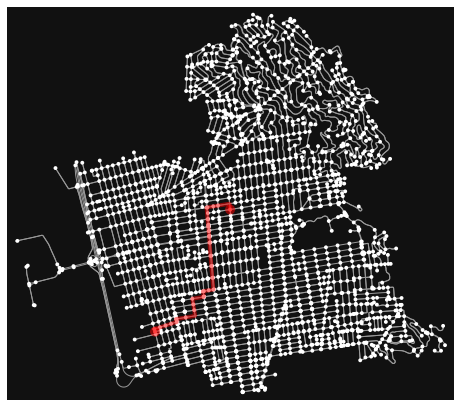

In [6]:
#Plot the shortest path using the library
map_graph = ox.graph_from_place('Berkeley, California', network_type='drive')
origin = ox.get_nearest_node(map_graph, (37.8743, -122.277))
destination = list(map_graph.nodes())[-1]
shortest_path = nx.shortest_path(map_graph, origin, destination, weight='length')
fig, ax = ox.plot_graph_route(map_graph, shortest_path)

In [34]:
#Dijkstras Algorithm
def dijkstras_alg(origin_node,goal_node,graph):
  #priority queue-has values associated to it
  open=priority_dict.priority_dict({})
  #dictionary containing the closed nodes
  closed={}
  #dictionary containing the predecessors of eack node
  predecessors={}
  # Add the origin to the queue.
  open[origin_node] = 0.0
  goal_reached=False
  while (open):
    i,i_cost=open.pop_smallest()
    if i==goal_node:
      print("reached")
      goal_reached=True
      break
    for link in graph.out_edges([i], data=True):
      j=link[1]
      if j in closed:
        continue
      #i to j cost
      ij_cost=link[2]['length']
      total_cost=ij_cost+i_cost
      
      if j in open:
        #Update the cost if it was greater before
        if total_cost < open[j]:
          open[j]=total_cost
          predecessors[j]=i
      else:
        open[j]=total_cost
        predecessors[j]=i
        
    closed[i]=i_cost
  return path_generator(origin_node,goal_node,predecessors)
  if goal_reached == False:
    print("goal not found!!")


In [35]:
# This function follows the predecessor
# It backpointers and generates the equivalent path from the origin as a list of vertex keys.
def path_generator(origin_key, goal_key, predecessors):
    key = goal_key
    path = [goal_key]
    
    while (key != origin_key):
        key = predecessors[key]
        path.insert(0, key)
        
    return path

reached


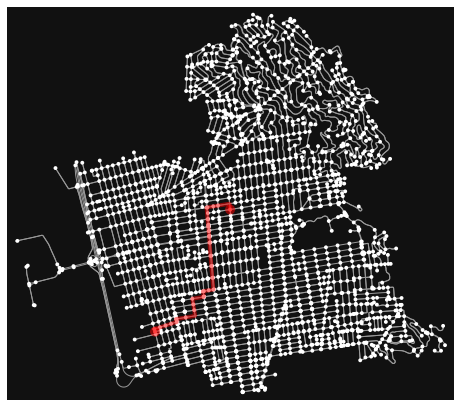

In [36]:
path_found = dijkstras_alg(origin, destination, map_graph)
fig, ax = ox.plot_graph_route(map_graph, path_found)